# Telco Customer Churn

The [Telco Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) predicts the ehaviour of retaining customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


- Dataset contains 7043 observations
- Dataset contains 21 columns or features

### Exploratory Data Analysis

- We can see on the data set that we have column Churn with variable output “yes” or “no”. By using this data we will build a predictive model for Churn Analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- No null values
- **_TotalCharges_** contains string values instead of float
- We have to remove raw data where the column **_TotalCharges_** have the value " ". The number of row data is 11.

In [5]:
len(df[df["TotalCharges"]==" "])

11

In [6]:
df = df[df["TotalCharges"] != " "]

In [7]:
len(df[df["TotalCharges"]==" "])

0

In [8]:
df.loc[:, "TotalCharges"] = df["TotalCharges"].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

### Feature Engineering

- Since column Tenure ar still an integer, we need to simplify tenure data before inputting this data to Machine Learning.

In [10]:
# categorize customers wrt tenure
def convert_to_buckets(tenure):
    if tenure <=24:
        return '0 - 24 months'
    elif tenure <36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '60 months'

In [11]:
df.loc[:, "tenure"] = df['tenure'].map(convert_to_buckets)
df['tenure'].value_counts()

tenure
0 - 24 months     3199
60 months         1407
48 - 60 months     832
36 - 48 months     812
24 - 36 months     782
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   object 
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [13]:
cols = df.columns
cols = cols.drop(['customerID', 'MonthlyCharges', 'TotalCharges'])
all_cat_cols = list(cols) # All the categorical features that are required for analysis, We will remove CustomerID as its not significant in the modelling

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in all_cat_cols:
    df[col] = labelencoder.fit_transform(df[col])
df[all_cat_cols].head()

<ipython-input-14-78a9e6d6add8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = labelencoder.fit_transform(df[col])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,2,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


### Modelling

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X = df.drop(['Churn', 'TotalCharges', 'customerID'], axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = df['Churn'])

In [18]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=8)
# fit the model clf_entropy.fit(x_train, y_train)

[Text(167.4, 190.26, 'X[14] <= 0.5\nentropy = 0.835\nsamples = 5625\nvalue = [4130, 1495]'),
 Text(83.7, 135.9, 'X[8] <= 0.5\nentropy = 0.986\nsamples = 3085\nvalue = [1756, 1329]'),
 Text(41.85, 81.53999999999999, 'X[7] <= 0.5\nentropy = 0.999\nsamples = 2099\nvalue = [1018, 1081]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.947\nsamples = 687\nvalue = [436, 251]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.978\nsamples = 1412\nvalue = [582, 830]'),
 Text(125.55000000000001, 81.53999999999999, 'X[17] <= 91.45\nentropy = 0.814\nsamples = 986\nvalue = [738, 248]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.762\nsamples = 838\nvalue = [653, 185]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.984\nsamples = 148\nvalue = [85, 63]'),
 Text(251.10000000000002, 135.9, 'X[17] <= 93.675\nentropy = 0.348\nsamples = 2540\nvalue = [2374, 166]'),
 Text(209.25, 81.53999999999999, 'X[14] <= 1.5\nentropy = 0.23\nsamples = 1906\nvalue = [1835, 71]'),
 Text(188.3250000000

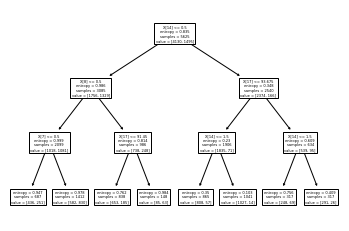

In [20]:
from sklearn import tree
tree.plot_tree(clf_entropy.fit(X_train, y_train))

In [26]:
y_pred = clf_entropy.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[872, 161],
       [173, 201]], dtype=int64)

In [40]:
cm[1,0]

173

In [34]:
data = {
    'y_Actual': np.array(y_test), 
    'y_Predicted': np.array(y_pred)
}
d = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
d

,y_Actual,y_Predicted
0,0,0
1,0,1
2,0,0
3,1,0
4,0,0
...,...,...
1402,0,0
1403,0,0
1404,0,0
1405,0,0


In [35]:
confusion_matrix = pd.crosstab(d['y_Actual'], d['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,872,161
1,173,201


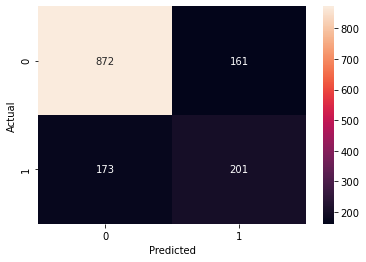

In [33]:
sns.heatmap(confusion_matrix, annot=True, fmt=".0f")
plt.show()

Imagine you run a business, and you want to keep your customers happy. There are two kinds of customers you need to pay attention to:

**Loyal Customers:** These are the customers who love your business and are likely to stick around. If you give them a special, expensive offer, it's okay because they'll stay with you, and that's not costly for your business.

**Customers About to Leave:** Some customers might be thinking about leaving your business. If you don't do something to make them stay, you could lose them, and that's not good for your business. Losing a customer is more expensive than keeping one.

Now, the important thing is to figure out which customers are about to leave so you can offer them something to make them stay. We use a metric called "Recall" to measure how good we are at finding these customers.

Recall is like a score that tells us how many of the customers who were thinking of leaving we actually found and helped to stay. In simple terms, it's about making sure we don't miss anyone who needs our help.

For example, if our Recall score is 84%, it means we were able to find and help 84 out of every 100 customers who were thinking of leaving. The higher the Recall score, the better we are at finding these customers.

In [42]:
recall = (cm[0,0]/(cm[0,0]+cm[1,0]))*100

In [43]:
recall

83.44497607655502

In [44]:
import pickle

In [46]:
pickle.dump(clf_entropy, open("Telco_Churn_Model", "wb"))